<a href="https://colab.research.google.com/github/UNB-TME/assignment-1-model-training-on-mnist-Prasadaddala96/blob/main/3752475_SubmissionAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from PIL import Image

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
# Load custom images from Google Drive
custom_images = []
custom_labels = []
base_folder_path = '/content/drive/MyDrive/data_assignment_1'
for folder_name in os.listdir(base_folder_path):
    folder_path = os.path.join(base_folder_path, folder_name)
    print(folder_path)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
          print('filename', filename)
          if filename.endswith('.png') or filename.endswith('.PNG') or filename.endswith('.jpg'):
              img_path = os.path.join(folder_path, filename)
              img = Image.open(img_path).convert('L')  # convert image to grayscale
              img = img.resize((28, 28))  # resize image to match MNIST data
              img = img.rotate(-90)
              threshold = 100
              img = img.point(lambda p: p > threshold and 255)
              img_array = np.array(img)
              custom_images.append(img_array)
              custom_labels.append(int(folder_name))  # use folder name as label

# Convert the list of custom images and labels to numpy arrays
custom_images = np.array(custom_images)
custom_labels = np.array(custom_labels)

# Preprocess the custom images
custom_images = custom_images / 255.0

/content/drive/MyDrive/data_assignment_1/2
filename 2.jpg
/content/drive/MyDrive/data_assignment_1/5
filename 5.jpg
/content/drive/MyDrive/data_assignment_1/3
filename 3.jpg
/content/drive/MyDrive/data_assignment_1/4
filename 4.jpg


In [27]:
custom_labels

array([2, 5, 3, 4])

In [28]:
display_image = custom_images[0] * 255

# Convert the image data to uint8
display_image = display_image.astype(np.uint8)

# Create a PIL image
img = Image.fromarray(display_image)

# Display the image
img

In [29]:
# Add the custom images and labels to the original MNIST dataset
x_train = np.concatenate((x_train, custom_images), axis=0)
y_train = np.concatenate((y_train, custom_labels), axis=0)

In [30]:
display_image = x_train[-1] * 255

# Convert the image data to uint8
display_image = display_image.astype(np.uint8)

# Create a PIL image
img = Image.fromarray(display_image)
img

In [31]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to be in the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0


In [32]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

import matplotlib.pyplot as plt


model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons (for the 10 classes)
])


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8779 - loss: 0.4311 - val_accuracy: 0.9589 - val_loss: 0.1461
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9648 - loss: 0.1202 - val_accuracy: 0.9700 - val_loss: 0.0982
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9771 - loss: 0.0779 - val_accuracy: 0.9758 - val_loss: 0.0794
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9827 - loss: 0.0564 - val_accuracy: 0.9660 - val_loss: 0.1030
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9873 - loss: 0.0426 - val_accuracy: 0.9754 - val_loss: 0.0838
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9904 - loss: 0.0326 - val_accuracy: 0.9764 - val_loss: 0.0807
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9913 - loss: 0.0279 - val_accuracy: 0.9780 - val_loss: 0.0801
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9943 - loss: 0.0

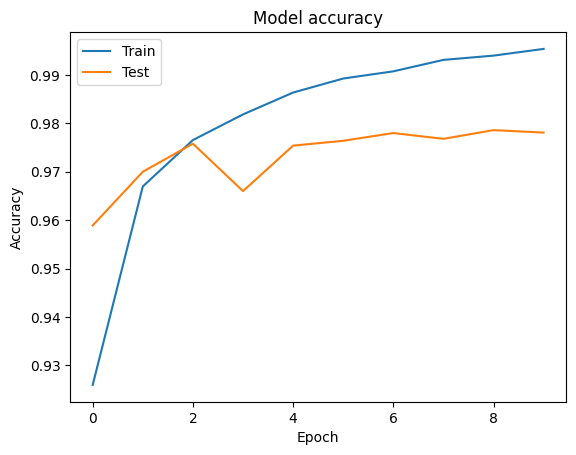

In [33]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9963 - loss: 0.0119 - val_accuracy: 0.9770 - val_loss: 0.0945
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9962 - loss: 0.0116 - val_accuracy: 0.9781 - val_loss: 0.0845
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9979 - loss: 0.0078 - val_accuracy: 0.9787 - val_loss: 0.0902
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9977 - loss: 0.0080 - val_accuracy: 0.9777 - val_loss: 0.0912
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9987 - loss: 0.0051 - val_accuracy: 0.9771 - val_loss: 0.0905
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9979 - loss: 0.0074 - val_accuracy: 0.9806 - val_loss: 0.0872
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9980 - loss: 0.0064 - val_accuracy: 0.9792 - val_loss: 0.1083
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9988 - loss: 0.0044

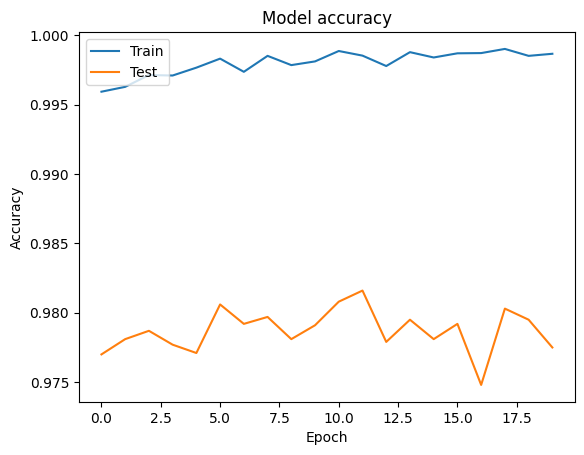

In [34]:
history_overfit = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
# Plot training & validation accuracy
plt.plot(history_overfit.history['accuracy'])
plt.plot(history_overfit.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [35]:
from keras.optimizers import Adam, SGD
# Using Adam optimizer
# Adam is an optimization algorithm .
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_adam = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Using SGD optimizer
# SGD stands for Stochastic Gradient Descent, a traditional optimization algorithm.
model.compile(optimizer=SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_sgd = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9989 - loss: 0.0033 - val_accuracy: 0.9773 - val_loss: 0.1347
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9987 - loss: 0.0036 - val_accuracy: 0.9806 - val_loss: 0.1192
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9993 - loss: 0.0020 - val_accuracy: 0.9804 - val_loss: 0.1249
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 0.9767 - val_loss: 0.1337
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9992 - loss: 0.0027 - val_accuracy: 0.9809 - val_loss: 0.1294
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9991 - loss: 0.0028 - val_accuracy: 0.9777 - val_loss: 0.1365
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9986 - loss: 0.0039 - val_accuracy: 0.9801 - val_loss: 0.1330
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9998 - loss: 0.0012 

In [18]:
# Using a smaller learning rate with SGD
# A smaller learning rate means the model will learn slowly and might need more epochs.
model.compile(optimizer=SGD(learning_rate=0.00001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_lr_small = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Using a larger learning rate with SGD
# A larger learning rate allows the model to learn faster but might risk overshooting the minimum loss.
model.compile(optimizer=SGD(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_lr_large = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 1.1677e-04 - val_accuracy: 0.9803 - val_loss: 0.1365
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 1.0000 - loss: 1.1429e-04 - val_accuracy: 0.9803 - val_loss: 0.1365
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 1.3014e-04 - val_accuracy: 0.9803 - val_loss: 0.1365
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 1.3052e-04 - val_accuracy: 0.9803 - val_loss: 0.1365
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 1.0000 - loss: 1.1612e-04 - val_accuracy: 0.9803 - val_loss: 0.1365
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 1.0000 - loss: 1.3601e-04 - val_accuracy: 0.9803 - val_loss: 0.1365
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 1.0000 - loss: 1.2839e-04 - val_accuracy: 0.9803 - val_loss: 0.1365
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accu

In [36]:
# Using a smaller batch size
# Smaller batches might offer better generalization at the cost of longer training times.
history_batch_min = model.fit(x_train, y_train, epochs=10, batch_size=16, validation_data=(x_test, y_test))

# Using a larger batch size
# Larger batches can expedite the training process but might lead to less accurate models.
history_batch_max = model.fit(x_train, y_train, epochs=10, batch_size=1024, validation_data=(x_test, y_test))


Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 1.0000 - loss: 2.0395e-04 - val_accuracy: 0.9808 - val_loss: 0.1302
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 1.0000 - loss: 1.6825e-04 - val_accuracy: 0.9809 - val_loss: 0.1300
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 1.0000 - loss: 1.5223e-04 - val_accuracy: 0.9809 - val_loss: 0.1299
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 1.0000 - loss: 1.4710e-04 - val_accuracy: 0.9809 - val_loss: 0.1298
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 1.0000 - loss: 1.3073e-04 - val_accuracy: 0.9809 - val_loss: 0.1296
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 1.0000 - loss: 1.1921e-04 - val_accuracy: 0.9809 - val_loss: 0.1295
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 1.0000 - loss: 1.1760e-04 - val_accuracy: 0.9809 - val_loss: 0.1295
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - ac

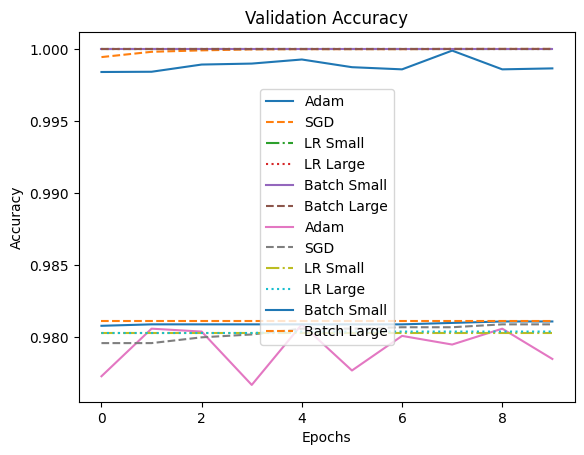

In [37]:
import matplotlib.pyplot as plt

plt.figure()

# Plotting training accuracy for all experiments for performance comparision
plt.plot(history_adam.history['accuracy'], label='Adam', linestyle='-')
plt.plot(history_sgd.history['accuracy'], label='SGD', linestyle='--')
plt.plot(history_lr_small.history['accuracy'], label='LR Small', linestyle='-.')
plt.plot(history_lr_large.history['accuracy'], label='LR Large', linestyle=':')
plt.plot(history_batch_min.history['accuracy'], label='Batch Small', linestyle='-')
plt.plot(history_batch_max.history['accuracy'], label='Batch Large', linestyle='--')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting validation accuracy for all experiments for performance comparision

plt.plot(history_adam.history['val_accuracy'], label='Adam', linestyle='-')
plt.plot(history_sgd.history['val_accuracy'], label='SGD', linestyle='--')
plt.plot(history_lr_small.history['val_accuracy'], label='LR Small', linestyle='-.')
plt.plot(history_lr_large.history['val_accuracy'], label='LR Large', linestyle=':')
plt.plot(history_batch_min.history['val_accuracy'], label='Batch Small', linestyle='-')
plt.plot(history_batch_max.history['val_accuracy'], label='Batch Large', linestyle='--')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()
